In [16]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [17]:
data = pd.read_csv("IMDB Dataset.csv")
data

,Unnamed: 0,review,sentiment,filtered_review
0,0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
...,...,...,...,...
49995,49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...


In [18]:
lb = LabelBinarizer()
y = lb.fit_transform(data['sentiment'])
lb.classes_

array(['negative', 'positive'], dtype='<U8')

In [19]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(data['filtered_review'])
print(x.shape,y.shape)

(50000, 94635) (50000, 1)


In [20]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'log_loss': make_scorer(log_loss)}

In [21]:
# The code above trains and evaluates a logistic regression model using 5-fold cross-validation and various performance metrics. 
# The mean values of the fit time, score time, and different evaluation metrics for both the training and testing sets are printed.
# Additionally, the n_jobs parameter is set to -1 which means the computation will be distributed across all available CPU cores, 
# potentially speeding up the training and evaluation process.



lr = LogisticRegression(random_state = 0, max_iter = 5)
lr_scores = cross_validate(lr, x, y, cv=5,scoring=scoring,return_train_score=True, verbose = 3, n_jobs = -1)
print("The Fit Time is: ",lr_scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",lr_scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",lr_scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",lr_scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",lr_scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",lr_scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",lr_scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",lr_scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",lr_scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",lr_scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",lr_scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",lr_scores['test_log_loss'].mean())
print("\n")
lr_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


The Fit Time is:  0.9585963726043701


The Score Time is:  0.029000091552734374


The Train Accuracy score is:  0.816495


The Train F1 score is:  0.8199094063282715


The Train Precision score is:  0.8049288605420056


The Train Recall score is:  0.83546


The Train Log Loss is:  6.338119109593931


The Test Accuracy score is:  0.8131600000000001


The Test F1 score is:  0.8166358442531545


The Test Precision score is:  0.8017223051486514


The Test Recall score is:  0.8321200000000001


The Test Log Loss is:  6.4533072602006785




{'fit_time': array([0.69900084, 0.69598079, 1.13700056, 1.11600018, 1.1449995 ]),
 'score_time': array([0.02000117, 0.01999879, 0.03200102, 0.0339992 , 0.03900027]),
 'test_accuracy': array([0.8155, 0.818 , 0.81  , 0.8125, 0.8098]),
 'train_accuracy': array([0.814625, 0.8165  , 0.817475, 0.817225, 0.81665 ]),
 'test_precision': array([0.80237684, 0.80718702, 0.79969064, 0.80181572, 0.7975413 ]),
 'train_precision': array([0.80429421, 0.8045319 , 0.80607375, 0.80518543, 0.80455901]),
 'test_recall': array([0.8372, 0.8356, 0.8272, 0.8302, 0.8304]),
 'train_recall': array([0.8316 , 0.83615, 0.8361 , 0.83695, 0.8365 ]),
 'test_f1': array([0.81941862, 0.8211478 , 0.81321274, 0.81576103, 0.81363904]),
 'train_f1': array([0.81771922, 0.82003629, 0.82081237, 0.8207605 , 0.82021866]),
 'test_log_loss': array([6.37248668, 6.2861371 , 6.56245035, 6.47610261, 6.56935955]),
 'train_log_loss': array([6.40270657, 6.33794669, 6.30427058, 6.31290581, 6.33276589])}

In [22]:

# The Decision Tree Classifier model seems to be overfitting to the training data, as there is a large 
# difference between the train and test scores across all metrics. This may indicate that the model is 
# too complex and is memorizing the training data instead of generalizing well to new data.

# The fit time for the Decision Tree Classifier model seems to be much shorter compared to 
# the Logistic Regression model, but the score time is longer. This suggests that the Decision Tree Classifier 
# model is quicker at fitting the data, but takes longer to make predictions on new data.


dt = DecisionTreeClassifier(random_state = 0, max_depth = 25)
dt_scores = cross_validate(dt, x, y, cv=5,scoring=scoring,return_train_score=True, verbose = 3, n_jobs = -1)
print("The Fit Time is: ",dt_scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",dt_scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",dt_scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",dt_scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",dt_scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",dt_scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",dt_scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",dt_scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",dt_scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",dt_scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",dt_scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",dt_scores['test_log_loss'].mean())
print("\n")
dt_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   53.9s remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   54.5s finished


The Fit Time is:  53.20839796066284


The Score Time is:  0.09760193824768067


The Train Accuracy score is:  0.875925


The Train F1 score is:  0.8820615397565017


The Train Precision score is:  0.8405435451716151


The Train Recall score is:  0.9279999999999999


The Train Log Loss is:  4.285469105742208


The Test Accuracy score is:  0.7445200000000001


The Test F1 score is:  0.7567532172736773


The Test Precision score is:  0.7222422232004475


The Test Recall score is:  0.79488


The Test Log Loss is:  8.824088867810806




{'fit_time': array([53.4609983 , 53.33799672, 54.05900025, 53.35399699, 51.82999754]),
 'score_time': array([0.08099914, 0.07800078, 0.07699633, 0.10300231, 0.14901114]),
 'test_accuracy': array([0.7442, 0.7466, 0.7364, 0.7466, 0.7488]),
 'train_accuracy': array([0.873825, 0.8777  , 0.88005 , 0.87375 , 0.8743  ]),
 'test_precision': array([0.72087554, 0.72345053, 0.71483097, 0.71830737, 0.73374671]),
 'train_precision': array([0.84172037, 0.84088448, 0.84572   , 0.82970183, 0.84469104]),
 'test_recall': array([0.797 , 0.7984, 0.7866, 0.8114, 0.781 ]),
 'train_recall': array([0.9208 , 0.9317 , 0.9297 , 0.94055, 0.91725]),
 'test_f1': array([0.75702888, 0.75907967, 0.74900019, 0.76202104, 0.75663631]),
 'train_f1': array([0.87948614, 0.88396584, 0.88572381, 0.88165542, 0.87947648]),
 'test_log_loss': array([8.83514238, 8.75224796, 9.10454691, 8.75225315, 8.67625393]),
 'train_log_loss': array([4.35799934, 4.22416284, 4.14299403, 4.3605977 , 4.34159162])}

In [23]:
# using cross-validation with 5 folds to evaluate the performance of both decision tree and 
# random forest classifiers on your data.

# using a range of evaluation metrics (accuracy, F1 score, precision, recall, and log loss) to assess the performance of 
# the models. 


rf = RandomForestClassifier(random_state = 0, max_depth = 25)
rf_scores = cross_validate(rf, x, y, cv=5,scoring=scoring,return_train_score=True, verbose = 3, n_jobs = -1)
print("The Fit Time is: ",rf_scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",rf_scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",rf_scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",rf_scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",rf_scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",rf_scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",rf_scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",rf_scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",rf_scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",rf_scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",rf_scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",rf_scores['test_log_loss'].mean())
print("\n")
rf_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   55.2s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.5s finished


The Fit Time is:  49.87840051651001


The Score Time is:  1.1555988311767578


The Train Accuracy score is:  0.9247350000000001


The Train F1 score is:  0.9269598009085034


The Train Precision score is:  0.9003616959276963


The Train Recall score is:  0.95518


The Train Log Loss is:  2.5996032680851267


The Test Accuracy score is:  0.84458


The Test F1 score is:  0.8487478181045731


The Test Precision score is:  0.8266050109706985


The Test Recall score is:  0.87212


The Test Log Loss is:  5.368089774469933




{'fit_time': array([49.69299865, 50.08499932, 50.27100086, 49.82400393, 49.51899981]),
 'score_time': array([1.21999979, 1.11899805, 1.03599954, 1.17999625, 1.22300053]),
 'test_accuracy': array([0.8517, 0.8434, 0.8439, 0.8404, 0.8435]),
 'train_accuracy': array([0.923825, 0.922875, 0.9282  , 0.922375, 0.9264  ]),
 'test_precision': array([0.83349137, 0.82667428, 0.82621893, 0.81968445, 0.82695603]),
 'train_precision': array([0.89966524, 0.89828114, 0.90323948, 0.89698764, 0.90363499]),
 'test_recall': array([0.879 , 0.869 , 0.871 , 0.8728, 0.8688]),
 'train_recall': array([0.95405, 0.95375, 0.95915, 0.95435, 0.9546 ]),
 'test_f1': array([0.855641  , 0.84730889, 0.84801869, 0.84540876, 0.84736175]),
 'train_f1': array([0.92605984, 0.92518492, 0.9303555 , 0.92478015, 0.9284186 ]),
 'test_log_loss': array([5.12217074, 5.40884523, 5.39157624, 5.51246547, 5.40539119]),
 'train_log_loss': array([2.63103383, 2.66384631, 2.47992522, 2.68111634, 2.54209464])}

In [25]:
# comparing the performance of three different classifiers (Decision Tree, Random Forest, and MLP)
# using cross-validation. 


mlp = MLPClassifier(hidden_layer_sizes=(150, 15, ), random_state=0, max_iter = 5)
mlp_scores = cross_validate(mlp, x, y, cv=5,scoring=scoring,return_train_score=True, verbose = 3, n_jobs = -1)
print("The Fit Time is: ",mlp_scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",mlp_scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",mlp_scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",mlp_scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",mlp_scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",mlp_scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",mlp_scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",mlp_scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",mlp_scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",mlp_scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",mlp_scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",mlp_scores['test_log_loss'].mean())
print("\n")
mlp_scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 23.3min remaining: 34.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.3min finished


The Fit Time is:  1390.884194612503


The Score Time is:  0.29900574684143066


The Train Accuracy score is:  0.99971


The Train F1 score is:  0.9997099972392673


The Train Precision score is:  0.9997000549687554


The Train Recall score is:  0.9997199999999999


The Train Log Loss is:  0.010016365094139626


The Test Accuracy score is:  0.8858


The Test F1 score is:  0.886562387962947


The Test Precision score is:  0.8808250992344313


The Test Recall score is:  0.8926400000000001


The Test Log Loss is:  3.944376655935275




{'fit_time': array([1390.90699887, 1390.29199815, 1392.066993  , 1392.04199076,
        1389.11299229]),
 'score_time': array([0.30202818, 0.38200235, 0.21399832, 0.21300077, 0.38399911]),
 'test_accuracy': array([0.8878, 0.8891, 0.8868, 0.8774, 0.8879]),
 'train_accuracy': array([0.99995 , 0.999625, 0.999725, 0.9996  , 0.99965 ]),
 'test_precision': array([0.89831553, 0.88685623, 0.86964832, 0.87263033, 0.87667508]),
 'train_precision': array([0.99995   , 0.99960002, 0.99950022, 0.99989994, 0.99955009]),
 'test_recall': array([0.8746, 0.892 , 0.91  , 0.8838, 0.9028]),
 'train_recall': array([0.99995, 0.99965, 0.99995, 0.9993 , 0.99975]),
 'test_f1': array([0.88629915, 0.88942068, 0.88936669, 0.87817965, 0.88954577]),
 'train_f1': array([0.99995   , 0.99962501, 0.99972506, 0.99959988, 0.99965003]),
 'test_log_loss': array([3.87529029, 3.8303958 , 3.90984402, 4.23450556, 3.87184761]),
 'train_log_loss': array([0.00172696, 0.0129522 , 0.00949836, 0.01381555, 0.01208875])}

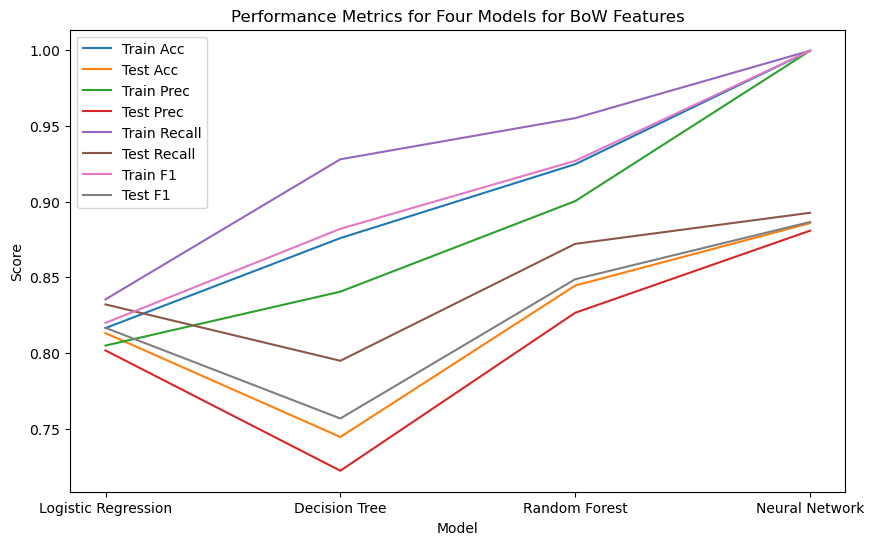

In [26]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Neural Network']
train_acc = [lr_scores['train_accuracy'].mean(), dt_scores['train_accuracy'].mean(), rf_scores['train_accuracy'].mean(), mlp_scores['train_accuracy'].mean()]
test_acc = [lr_scores['test_accuracy'].mean(), dt_scores['test_accuracy'].mean(), rf_scores['test_accuracy'].mean(), mlp_scores['test_accuracy'].mean()]
train_prec = [lr_scores['train_precision'].mean(), dt_scores['train_precision'].mean(), rf_scores['train_precision'].mean(), mlp_scores['train_precision'].mean()]
test_prec = [lr_scores['test_precision'].mean(), dt_scores['test_precision'].mean(), rf_scores['test_precision'].mean(), mlp_scores['test_precision'].mean()]
train_recall = [lr_scores['train_recall'].mean(), dt_scores['train_recall'].mean(), rf_scores['train_recall'].mean(), mlp_scores['train_recall'].mean()]
test_recall = [lr_scores['test_recall'].mean(), dt_scores['test_recall'].mean(), rf_scores['test_recall'].mean(), mlp_scores['test_recall'].mean()]
train_f1 = [lr_scores['train_f1'].mean(), dt_scores['train_f1'].mean(), rf_scores['train_f1'].mean(), mlp_scores['train_f1'].mean()]
test_f1 = [lr_scores['test_f1'].mean(), dt_scores['test_f1'].mean(), rf_scores['test_f1'].mean(), mlp_scores['test_f1'].mean()]

fig, axs = plt.subplots(figsize=(10, 6))

axs.plot(models, train_acc, label='Train Acc')
axs.plot(models, test_acc, label='Test Acc')
axs.plot(models, train_prec, label='Train Prec')
axs.plot(models, test_prec, label='Test Prec')
axs.plot(models, train_recall, label='Train Recall')
axs.plot(models, test_recall, label='Test Recall')
axs.plot(models, train_f1, label='Train F1')
axs.plot(models, test_f1, label='Test F1')

axs.set_xlabel('Model')
axs.set_ylabel('Score')
axs.legend()
axs.set_title('Performance Metrics for Four Models for BoW Features')

plt.show()

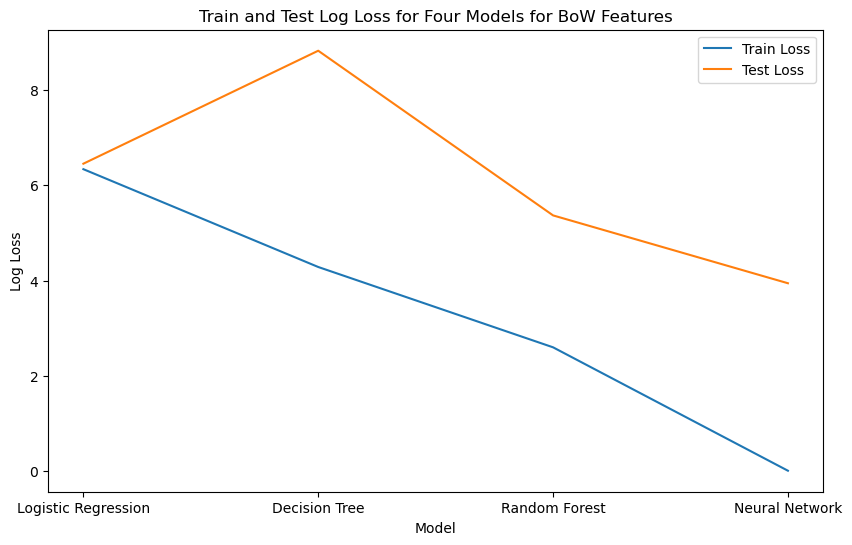

In [27]:
train_loss = [lr_scores['train_log_loss'].mean(), dt_scores['train_log_loss'].mean(), rf_scores['train_log_loss'].mean(), mlp_scores['train_log_loss'].mean()]
test_loss = [lr_scores['test_log_loss'].mean(), dt_scores['test_log_loss'].mean(), rf_scores['test_log_loss'].mean(), mlp_scores['test_log_loss'].mean()]

fig, axs = plt.subplots(figsize=(10, 6))

axs.plot(models, train_loss, label='Train Loss')
axs.plot(models, test_loss, label='Test Loss')

axs.set_xlabel('Model')
axs.set_ylabel('Log Loss')
axs.legend()
axs.set_title('Train and Test Log Loss for Four Models for BoW Features')

plt.show()
